# Least Squares 

## Introduction with a linear function
In the lecture we started the discussion of the least squares method using the example of a linear function $f(x) = ax + b$ and a set of data points $(x_i, y_i)$, $i=1,\ldots,n$. We defined the error function as
$$
L(a,b) = \sum_{i=1}^n (y_i - y(x_i))^2 = \sum_{i=1}^n r_i = r^T r=\|r\|^2,
$$
where $y(x_i) = ax_i + b$ is the linear function and $r_i$ is the residual for the $i$-th data point. The least squares method then consists in finding the values of $a$ and $b$ that minimize the error function $L(a,b)$:
$$
\min_{a,b} L(a,b).
$$
In general this is an optimization problem that can be solved using the methods discussed in the lecture. However, in the case of a linear function $f(x) = ax + b$ we learned that the solution can be found in closed form. We can rewrite the error $r$ as
$$
r = \begin{pmatrix}
r_1 \\
r_2 \\
\vdots \\
r_n
\end{pmatrix} =
\begin{pmatrix}
1  x_1 \\
1  x_2 \\
\vdots \vdots \\
1  x_n
\end{pmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} -
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix} = A p - y,
$$
where $p = (a,b)^T$ is the vector of parameters. This is similar to the linear system $Ax = b$ that we discussed in the lasst exercise. However, this time our system of equations is overdetermined, i.e. we have more equations than unknowns. In this case we cannot expect to find a solution $p$ such that $Ap = y$ (i.e. $r=0$). Instead we have to find a solution $p$ such that $Ap \approx y$, i.e. $r \approx 0$. The least squares solution is defined as the solution that minimizes the error $\|r\|^2$. We can find this solution by solving the normal equations
$$
A^T A p^* = A^T y.
$$
In the case of a linear function $f(x) = ax + b$ we can solve these equations in closed form and obtain the solution
$$
p^* = (A^T A)^{-1} A^T y.
$$
Remember that $(A^T A)^{-1} A^T$ is called the Moore-Penrose pseudoinverse of $A$ and is denoted by $A^+$. We can now compute the least squares solution $p^*$ for a given set of data points $(x_i, y_i)$, $i=1,\ldots,n$ if $A$ is not rank deficient. 

## Linear Least Squares Tasks

### Setup

First, we'll need to generate a set of data points that roughly follow a linear trend but with some noise added. We'll use the function $f(x) = 2x + 3$ to generate the $y_i$ values. We'll then add some Gaussian noise to the $y_i$ values to simulate real-world measurements.

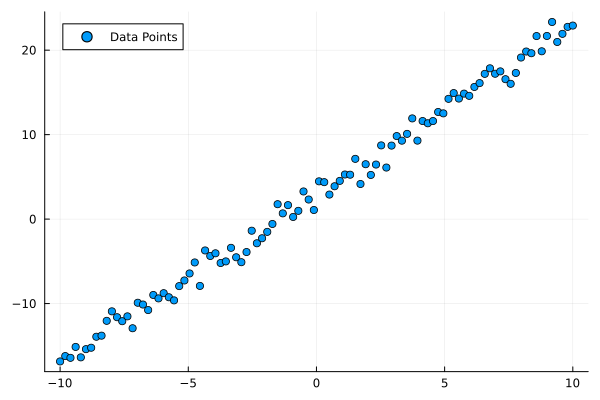

In [1]:
using Plots

# Generate x values
x = LinRange(-10, 10, 100)

# Generate y values with added noise
y = 2 .* x .+ 3 + randn(length(x))

# Plot the data points
scatter(x, y, label="Data Points")

### Task: Matrix Formation

The next step is to form the matrix $A$. 

1. Construct the matrix $A$. Remember, the first column should be all ones (for the constant term in the linear function) and the second column should be the $x_i$ values.

In [2]:
n = length(x)
A = [ones(n) x]

100×2 Matrix{Float64}:
 1.0  -10.0
 1.0   -9.79798
 1.0   -9.59596
 1.0   -9.39394
 1.0   -9.19192
 1.0   -8.9899
 1.0   -8.78788
 1.0   -8.58586
 1.0   -8.38384
 1.0   -8.18182
 ⋮    
 1.0    8.38384
 1.0    8.58586
 1.0    8.78788
 1.0    8.9899
 1.0    9.19192
 1.0    9.39394
 1.0    9.59596
 1.0    9.79798
 1.0   10.0

### Task: Solving the Normal Equations

Now, we are ready to solve the normal equations to get the least squares solution.

1. Compute the matrix $A^T A$ and the vector $A^T y$ in a seperate cell and view the results.

> In Julia you can use ' to transpose a matrix 

In [3]:
# Compute the matrix $A^T A$ and the vector $A^T y$
AtA = A' * A

2×2 Matrix{Float64}:
 100.0             6.39488e-14
   6.39488e-14  3400.67

In [4]:
Aty = A' * y

2-element Vector{Float64}:
  294.2211396107036
 6796.930513570782

2. Solve the system of equations $A^T A p = A^T y$ to find $p$ 

In [5]:
# Solve the linear system $A^T A p = A^T y$
p = AtA \ Aty

2-element Vector{Float64}:
 2.9422113961070346
 1.9987013490401213

### Task: Verification

Finally, verify the solution you obtained. 

1. Compute the residuals $r_i$ and the total  mean squared error.

2. Plot the original data points, the true line $f(x)$, and the line corresponding to your solution. 

In [6]:
# Compute the residuals $r_i$ and the total mean squared error
using Statistics
residuals = y - A * p
error = Statistics.mean(residuals.^2)

0.9979415805437135

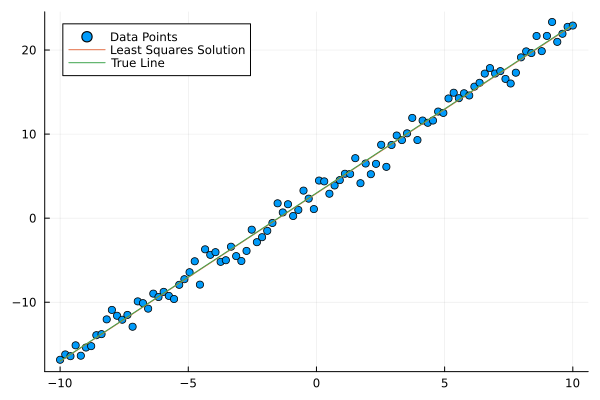

In [17]:
# Plot the original data points, the true line $f(x)$, and the line corresponding to your solution.
scatter(x, y, label="Data Points")
plot!(x, p[1] .+ p[2] .* x, label="Least Squares Solution")
plot!(x, 2 .* x .+ 3, label="True Line")

### Task: Using the Julia built-in function
You can use also the build in function `\` to solve linear equations in Julia since it uses the least squares method if the system is overdetermined. 

1. Build a linear equation of type $Ax=b$ and solve it with the `\` function. Compare the result with the solution you obtained erlier.

Error: 0.9979415805437136


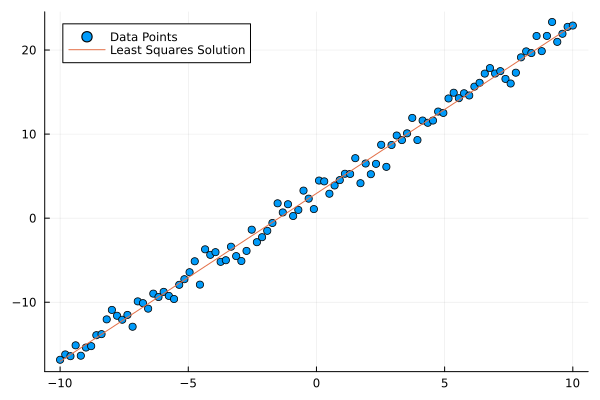

In [21]:
# Solve the linear equation using the build in function
A = [ones(length(x)) x]
b = y
p = A \ b

# Compute the residuals $r_i$ and the total mean squared error
residuals = y - A * p
error = Statistics.mean(residuals.^2)
println("Error: ", error)

scatter(x, y, label="Data Points")
# Plot the original data points, the true line $f(x)$, and the line corresponding to your solution.
plot!(x, p[1] .+ p[2] .* x, label="Least Squares Solution")
# plot!(x, 2 .* x .+ 3, label="True Line")

### Task: Implement a function that computes the least squares solution
Now we want to implement a function that computes the least squares solution for a given set of data points $(x_i, y_i)$, $i=1,\ldots,n$.

1. Implement a function `least_squares` that takes as input the vectors $x$ and $y$ and returns the least squares solution $p^*$ together with the matrix $A$. 

In [32]:
function least_squares(x, y)
    n = length(x)
    A = [ones(n) x]
    b = y
    p = A \ b
    p, A
end

least_squares (generic function with 1 method)

In [ ]:
p, A = least_squares(x, y)
residuals = y - A * p
error = Statistics.mean(residuals.^2)
println("Error: ", error)

## Linear Least Squares using real world data

We measured the current $I$ of the first joint of our Openmanipulator robot for different goal currents $I_g$ and obtained the following data points seen in the image below: 

<img src="./omp_currents.png">

We want to find a linear function $I = f(I_g)$ that describes the relationship between the goal current $I_g$ and the actual current $I$. We want to know how accuarate we can predict the actual current $I$ for a given goal current $I_g$. Fist let's load the data points into Julia.

In [24]:
using Pkg
# Pkg.generate("learningF")
Pkg.activate("learningF")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")

  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/IngGru_numerik/SS2024/Excercise/Exercise 10/learningF`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/IngGru_numerik/SS2024/Excercise/Exercise 10/learningF/Project.toml`
  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/IngGru_numerik/SS2024/Excercise/Exercise 10/learningF/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/IngGru_numerik/SS2024/Excercise/Exercise 10/learningF/Project.toml`
  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/IngGru_numerik/SS2024/Excercise/Exercise 10/learningF/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/IngGru_numerik/SS2024/Excercise/Exercise 10/learningF/Project.toml

In [29]:
using CSV                               # CSV Parser
using Plots                             # Graph Plotter
using Statistics                        # Mean and Variance
using LinearAlgebra

csv = CSV.File(joinpath(@__DIR__, "omp_currents.csv"))      # load and parse csv

x_train = csv.columns[5].column                      # mask column 5 (Goal Current)
y_train = csv.columns[4].column                      # mask column 4 (Present Current)

# x_train = x[1:1000]                       # take the first 800 values
# y_train = y[1:1000]                       # take the first 800 values

mean = Statistics.mean(x_train)           # calculate the mean
std = Statistics.std(x_train)             # calculate the variance

function dataPreProcess(x, y)
    x = Float64.(x)
    y = Float64.(y)
    # make the data zero mean and unit variance
    x = x .- mean
    x = x ./ std
    y = y .- mean
    y = y ./ std
    x, y
end

# data post procseeing (make it human frindly)
function dataPostProcess(x, y)
    x = x .* std
    x = x .+ mean
    y = y .* std
    y = y .+ mean
    x, y
end

# data pre processing
x_train, y_train = dataPreProcess(x_train, y_train)

([1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646  …  -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576], [1.7486100005861305, 1.460725416554055, 1.4967109895580646, 1.4967109895580646, 1.4787182030560597, 1.4787182030560597, 1.4787182030560597, 1.4787182030560597, 1.4427326300520504, 1.4787182030560597  …  -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576])

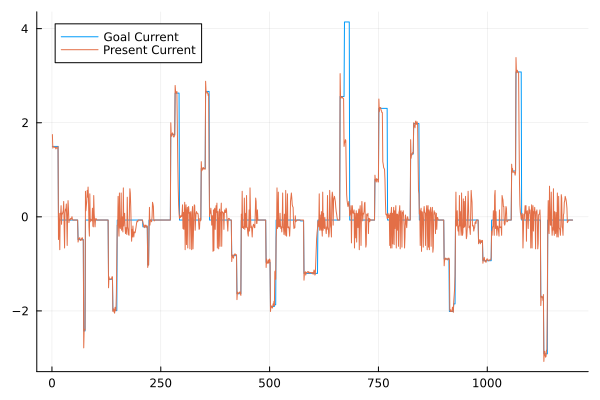

In [30]:
# plot the goal current vs the present current
plot(x_train, label="Goal Current")
plot!(y_train, label="Present Current")

### Task: Compute the parameters of the linear function
Now we want to compute the parameters $p_1$ and $p_2$ of the linear function $I = f(I_g) = p_1*I_g + p_2$ that best fits the data points.

1. Compute the parameters $a$ and $b$ of the linear function $I = f(I_g) =p_1*I_g + p_2$ that best fits the data points using the least squares method you implemented earlier.

2. Estimate the mean squared error of the linear function.

In [33]:
p, A = least_squares(x_train, y_train)
residuals = y_train - A * p
error = Statistics.mean(residuals .^ 2)
println("Error: ", error)

Error: 0.1878335628013888


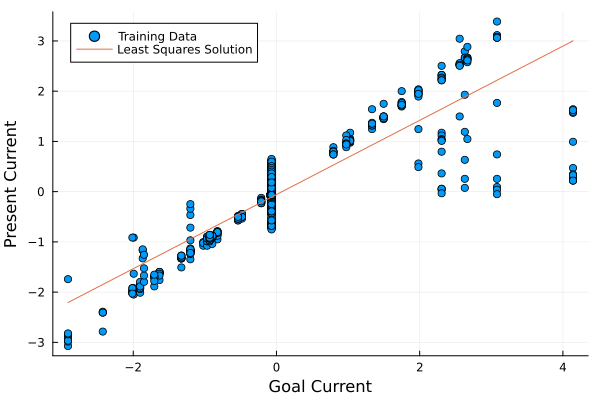

In [34]:
# Plot the original data points and the line corresponding to your solution
scatter(x_train, y_train, xlabel="Goal Current", ylabel="Present Current", label="Training Data", legend=:topleft)
# plot the least squares solution
plot!(x_train, p[1] .+ p[2] .* x_train, label="Least Squares Solution")

## Solving underdetermined systems using the pseudoinverse
If we have a linear system $Ax = b$ with more unknowns than equations, i.e. $A$ is rank deficient, then we cannot use the known tools to find a solution $x$ such that $Ax = b$. We can however define: 
$$
B = A^T
$$
and use the pseudoinverse of $B^+$ 
$$
B^+ = (B^T B)^{-1} B^T
$$
with 
$$
(B^+)^T = A^T (A A^T)^{-1}
$$
Hence, if we use the pseudoinverse of the system we find the solution with minimal norm, i.e. the solution that minimizes $\|x\|$. In this exercise we will use the pseudoinverse to find the least squares solution of an underdetermined system of equations.

### Setup

We first need to create an underdetermined system of equations. Let's make this system a little simpler for ease of computation.

In [35]:
# Create a 2x3 matrix $A$ with random values.
A = rand(2, 3)

# Generate a 2-dimensional vector $b$ also with random values.
b = rand(2)

2-element Vector{Float64}:
 0.6333103061330699
 0.7818488631284695

### Task: Compute the Pseudoinverse

Now we will compute the pseudoinverse $B^+$ of the transposed matrix $B = A^T$.

1. Compute the matrix $B$ by transposing $A$.

2. Compute the pseudoinverse $B^+$ using the formula provided. Note that this might involve computing a matrix inverse.

In [38]:
# Compute the matrix $B$ by transposing $A$.
B = A'

# Compute the pseudoinverse $B^+$ using B^+ = (B^T B)^{-1} B^T
B_plus = inv(B' * B) * B'


2×3 Matrix{Float64}:
  1.23079   -0.476189  0.0865368
 -0.429981   1.30375   0.146745

### Task: Solve the Underdetermined System

With the pseudoinverse $B^+$, we can now solve for $x$.

1. Compute the solution $x = (B^+)^T b$.

2. Print the solution $x$.

In [39]:
# Compute the solution $x = (B^+ b$.
x = B_plus' * b

# Print the solution $x$.
println("x = ", x)

x = [0.4432924130566854, 0.7177601748752747, 0.16953711184023318]


### Task: Verification

Finally, we should verify the solution we obtained.

1. Compute the vector $Ax$ and compare it with $b$. Given that we have an underdetermined system, they are not likely to be the same.

2. Compute the norm of $x$ 

3. Compare your solution with the one obtained using the function `\`. Also compare the norm of the solution obtained with `\` with the norm of the solution obtained with the pseudoinverse.

In [40]:
# Compute the vector $Ax$ and compare it with $b$. Given that we have an underdetermined system, they are not likely to be the same.
println("Ax = ", A * x)
println("b = ", b)

# Compute the norm of $x$ and discuss why this solution is preferable when we have an underdetermined system.
println("norm(x) = ", norm(x))

# compare to \
x = A \ b
println("x = ", x)
println("norm(x) = ", norm(x))

Ax = [0.6333103061330699, 0.7818488631284694]
b = [0.6333103061330699, 0.7818488631284695]
norm(x) = 0.8604828088937811
x = [0.44329241305668543, 0.7177601748752748, 0.16953711184023323]
norm(x) = 0.8604828088937813


# Solving the inverse kinematics of the Openmanipulator 

Now that we know that we can solve under and overdetemined linear equations we can actually solve the inverse kinematics in a different way. Do you know how?

In [42]:
import Pkg
Pkg.activate("../Exercise 4/OpenMEnv")
using Revise
include("../OpenManipulatorLib/OpenManipulatorKinematics.jl")
import .OpenManipulatorKinematics

  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/IngGru_numerik/SS2024/Excercise/Exercise 4/OpenMEnv`


In [43]:
goal_position, desired_orientation = OpenManipulatorKinematics.complete_forward_kinematics([0.6, 0.6, -0.5, -0.1])

2-element Vector{Vector{Float64}}:
 [0.24540155680128894, 0.1851227907367747, 0.1562121956827513]
 [0.0, -7.398860208066362e-18, 0.6000000000000001]

In [44]:
using ForwardDiff

# Define a function that returns the position of the end effector
function f_rootfindingProblem(q) 
    end_effector_position, end_effector_orientation = OpenManipulatorKinematics.complete_forward_kinematics(q)
    f_1 = end_effector_position[1] - goal_position[1]
    f_2 = end_effector_position[2] - goal_position[2]
    f_3 = end_effector_position[3] - goal_position[3]
    f_4 = end_effector_orientation[1] - desired_orientation[1]
    f_5 = end_effector_orientation[2] - desired_orientation[2]
    f_6 = end_effector_orientation[3] - desired_orientation[3]
    return [f_1, f_2, f_3, f_4, f_5, f_6]
end

f_rootfindingProblem (generic function with 1 method)

In [45]:
f_rootfindingProblem([0.6, 0.6, -0.5, -0.1])

6-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [46]:
function solver(A, b)
    return A \ b
end

function newton(f, x)
    h = Inf64
    tolerance = 10^(-10)
    iter = 0
    J(x) = ForwardDiff.jacobian(f, x)
    while (norm(h) > tolerance)
        iter += 1
        if iter > 1000
            error("Too many iterations")
        end
        h = solver(J(x), f(x))
        x = x - h
    end
    return x
end

newton (generic function with 1 method)

In [53]:
q_init = [0.1, 0.0, 0.0, 0.0] # A position relatively close to the goal position
newton(f_rootfindingProblem, q_init)

4-element Vector{Float64}:
  0.6000000000000001
  0.6000000000000004
 -0.5000000000000008
 -0.09999999999999958